# Question 2 (MM20B07)

### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [2]:
df = pd.read_csv('/content/drive/MyDrive/sem 7/ID5055/Assignment 2/q2 Weibull.csv')

<ipython-input-3-3fac749752ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: title={'center': 'Data Distribution Histogram'}, ylabel='Density'>

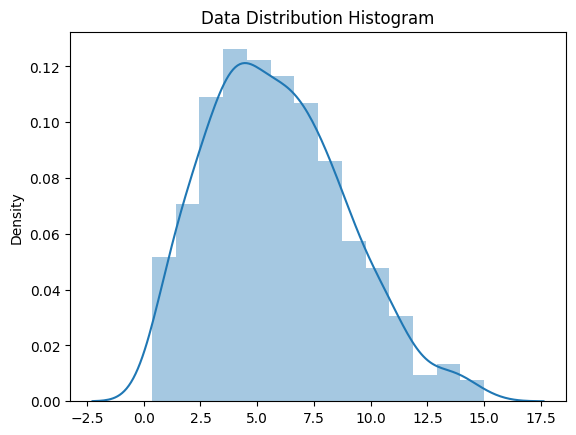

In [3]:
plt.title('Data Distribution Histogram')
sns.distplot(df)

### Parameter estimation using MLE

The Weibull distribution is given by:

$
f(x;\lambda,k) = \begin{cases}
{\frac {k}{\lambda }}\left({\frac {x}{\lambda }}\right)^{k-1}e^{-(x/\lambda )^{k}}, & \text{if } x\geq 0, \\
0, & \text{if } x<0.
\end{cases}
$

In [4]:
def log_likelihood_weibull(parameters, data):
    lambda_ = parameters[0]
    k = 2.0
    if lambda_ <= 0:
        return np.inf
    log_likelihood = np.sum(np.log((k / lambda_) * (data / lambda_)**(k-1) * np.exp(-(data / lambda_)**k)))
    return -log_likelihood

initail_parameters = [1.0]

result = minimize(log_likelihood_weibull, initail_parameters, args = (df,))

# Estimated parameter
estimated_lamda = result.x[0]
print("Estimated lambda:", estimated_lamda)

Estimated lambda: 6.581546500160183


So the estimated value of λ = 6.581546500160183.

To estimate the parameter σ of the Rayleigh distribution, which is given by:

$f(x; \sigma) = \frac{x}{\sigma^2} e^{-\frac{x^2}{2\sigma^2}}, \quad x \geq 0$

we can use the invariance property of MLE.

According to the Invariance property, if we have an estimate of parameter or set of parameters of a statistical distribution, then we can use this estimate to calculate MLE estimates for related paramters.
In the context of the Rayleigh and Weibull distributions, there is a connection between the two distributions based on their parameters. For k = 2, Weibull distribution turns into Rayleigh distribution with **λ = $\sqrt{2}$σ** or we can say that Rayleigh distribution is a special case of Weibull distribution.

Now, since we have estimate for λ, which is 6.581546500160183, we can use the above relation to get σ = (6.581546500160183) / $\sqrt{2}$ = 4.653856039522699.



In [5]:
# Maximum Likelihood Estimation for σ in the Rayleigh distribution
def rayleigh_log_likelihood(sigma, data):
    if sigma <= 0:
        return np.inf
    log_likelihood = np.sum(np.log((data / sigma**2) * np.exp(-data**2 / (2 * sigma**2))))
    return -log_likelihood

result_rayleigh = minimize(rayleigh_log_likelihood, [1.0], args=(df,))
sigma_mle = result_rayleigh.x[0]

print(f"MLE estimate for σ in Rayleigh distribution: {sigma_mle}")

MLE estimate for σ in Rayleigh distribution: 4.653856039522699


The σ value after Maximum Likelihood estimation of Weibull distribution matches with the calculated value.